In [1]:
import pandas as pd
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import numpy as np
import datetime
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# retrieve Citibike data from web
ride_frames = []

# The months
months = ['01', '07'] #Jan and July
for month in months:
    url = "https://s3.amazonaws.com/tripdata/2015%s-citibike-tripdata.zip" % month
    r = urllib2.urlopen(url).read()
    f = ZipFile(StringIO(r))
    csv = f.open("2015%s-citibike-tripdata.csv" % month)
    frame = pd.read_csv(csv)
    
    # Citibike date format is inconsistent between months
    try:
        frame['starttime'] = pd.to_datetime(frame.starttime, format='%m/%d/%Y %H:%M:%S')
        frame['stoptime'] = pd.to_datetime(frame.stoptime, format='%m/%d/%Y %H:%M:%S')
    except:
        try:
            frame['starttime'] = pd.to_datetime(frame.starttime, format='%m/%d/%Y %H:%M')
            frame['stoptime'] = pd.to_datetime(frame.stoptime, format='%m/%d/%Y %H:%M')
        except:
            frame['starttime'] = pd.to_datetime(frame.starttime)
            frame['stoptime'] = pd.to_datetime(frame.stoptime)
            
    ride_frames.append(frame)
    
# Individual dataframes for each month
janRides = ride_frames[0]
julRides = ride_frames[1]

In [3]:
# Adding day of month attribute to the dataframes
janRides['rides'] = janRides['starttime'].dt.day
julRides['rides'] = julRides['starttime'].dt.day

# Generates new df column with ride times
janRides['times'] = (janRides.stoptime-janRides.starttime).astype('timedelta64[m]')
julRides['times'] = (julRides.stoptime-julRides.starttime).astype('timedelta64[m]')

In [4]:
# Creating separate dataframes for customer total, subscriber total,
# subscriber will be grouped by male and female by day
janCust = janRides[(janRides.usertype == 'Customer')] 
janSubtot = janRides[(janRides.usertype == 'Subscriber')]
janMsub = janSubtot[(janSubtot.gender == 1)]
janFsub = janSubtot[(janSubtot.gender == 2)]

julCust = julRides[(julRides.usertype == 'Customer')] 
julSubtot = julRides[(julRides.usertype == 'Subscriber')] 
julMsub = julSubtot[(julSubtot.gender == 1)]
julFsub = julSubtot[(julSubtot.gender == 2)]

In [5]:
# for Jan
jan1 = janRides.groupby(janRides.rides)
jan1grp = jan1['rides'].count()

jan2 = janCust.groupby(janCust.rides)
jan2grp = jan2['rides'].count()

jan3 = janSubtot.groupby(janSubtot.rides)
jan3grp = jan3['rides'].count()

jan4 = janMsub.groupby(janMsub.rides)
jan4grp = jan4['rides'].count()

jan5 = janFsub.groupby(janFsub.rides)
jan5grp = jan5['rides'].count()

# calculates mean for times grouped by date
jantimes = jan1['times'].mean()

In [6]:
# for July
jul1 = julRides.groupby(julRides.rides)
jul1grp = jul1['rides'].count()

jul2 = julCust.groupby(julCust.rides)
jul2grp = jul2['rides'].count()

jul3 = julSubtot.groupby(julSubtot.rides)
jul3grp = jul3['rides'].count()

jul4 = janMsub.groupby(julMsub.rides)
jul4grp = jul4['rides'].count()

jul5 = julFsub.groupby(julFsub.rides)
jul5grp = jul5['rides'].count()

# calculates mean for times grouped by date
jultimes = jul1['times'].mean()

In [7]:
#julmean = jul1['date'].count().mean()
#julmean.plot(kind='line')
#jantimesPD = pd.Series(jantimes)
jantimesdf = pd.DataFrame(jantimes)
janridesdf = pd.DataFrame(jan1grp)

jultimesdf = pd.DataFrame(jultimes)
julridesdf = pd.DataFrame(jul1grp)

In [8]:
jan1grptimes = jantimesdf.merge(janridesdf, right_index=True, left_index=True)
jul1grptimes = jultimesdf.merge(julridesdf, right_index=True, left_index=True)

#jan1grptimes1 = jan1grptimes.reset_index()
#jul1grptimes1 = jul1grptimes.reset_index()

In [9]:
jan1grptimes['x'] = np.arange(31)
jul1grptimes['x'] = np.arange(31)

jan1grptimes['timelog'] = log(jan1grptimes['times'])
jul1grptimes['timelog'] = log(jul1grptimes['times'])

In [10]:
print jan1grptimes
print jul1grptimes

           times  rides   x   timelog
rides                                
1      13.367689   5317   0  2.592840
2      12.181175  11304   1  2.499892
3      10.918937   4478   2  2.390499
4      11.326538   7849   3  2.427149
5      10.632428  14506   4  2.363909
6      10.581645   8739   5  2.359121
7       9.824487   9646   6  2.284878
8       9.931769   8779   7  2.295739
9      10.609836   7930   8  2.361782
10      9.941071   6109   9  2.296675
11     10.393063   7467  10  2.341139
12     10.399075   8645  11  2.341717
13     10.305697  12797  12  2.332697
14     10.383463  13086  13  2.340214
15     10.554103  14075  14  2.356515
16     10.424041  13843  15  2.344115
17     10.955680   7491  16  2.393858
18     12.050696   1795  17  2.489122
19     11.530906  10710  18  2.445031
20     10.799182  16129  19  2.379470
21     10.441053  15234  20  2.345745
22     10.677446  15864  21  2.368134
23     10.659274  15737  22  2.366430
24     10.504570   4814  23  2.351810
25     12.01

In [11]:
import matplotlib.cm as cm # for ride time points colormap

(0, 45000)

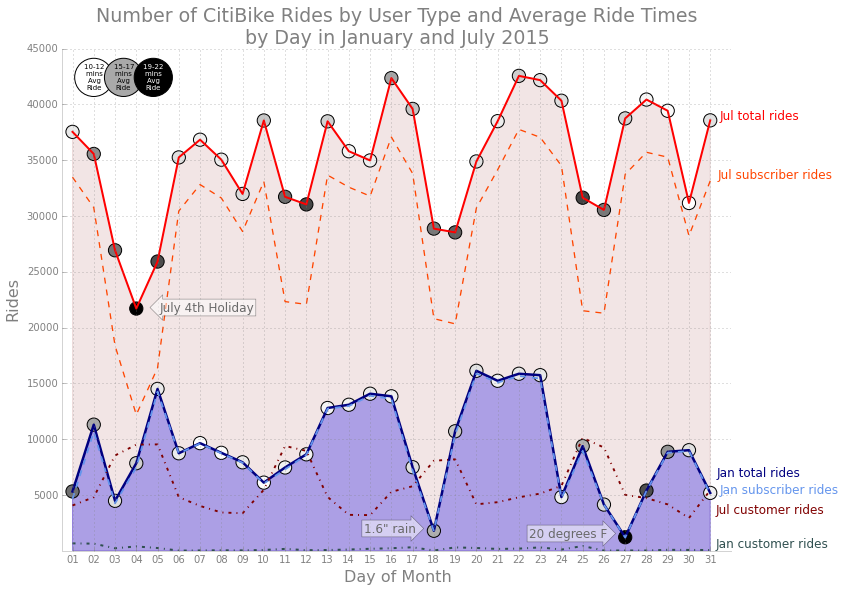

In [14]:
ind1 = np.arange(31)

plt.figure(figsize=(12, 9), facecolor='w')  
ax1 = plt.subplot(111) 

# plotting lines for user type by day and totals Jan
ax1.line = plot(jan1grp, color = "navy", lw = 2.5) # total
ax1.line = plot(jan3grp, color = "cornflowerblue", lw = 1.8, ls='--') # subscriber
ax1.line = plot(jan2grp, color = "darkslategrey", lw = 2, ls="-.") # customer

#too cluttered with this:
#ax1.line = plot(jan4grp, color = "cornflowerblue", lw = 1.1) # male subscriber
#ax1.line = plot(jan5grp, color = "cornflowerblue", lw = 1.1) # female subscriber

# plotting lines for user type by day and totals July
ax1.line = plot(jul1grp, color = "red", lw = 2) # total
ax1.line = plot(jul3grp, color = "orangered", lw = 1.3, ls="--") # subscriber
ax1.line = plot(jul2grp, color = "maroon", lw = 1.9, ls='-.') # customer

#too cluttered with this:
#ax1.line = plot(jul4grp, color = "k", lw = 1.1) # male subscriber
#ax1.line = plot(jul5grp, color = "salmon", lw = 1.1) # female subscriber

# For filling area below line
x = ind1
x.tolist()

fill_between(x, jan1grp, color = 'b', alpha = .3)
fill_between(x, jul1grp, color = 'maroon', alpha = .1)

# adding text for labels, title and axes ticks
ax1.set_ylabel('Rides', fontsize = 16, color = 'grey')
ax1.set_xlabel('Day of Month', fontsize = 16, color ='grey')
ax1.set_title('Number of CitiBike Rides by User Type and Average Ride Times \nby Day in January and July 2015', 
              fontsize = 19, color = "grey")
ax1.set_xticks(ind1)
ax1.yaxis.set_ticks_position('left')

# Generating tick labels
ticklabels1 = [str(date).zfill(2) for date in range(1, 32)]
ax1.set_xticklabels(ticklabels1)

# Styling chart borders
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color('lightgrey')
ax1.spines["bottom"].set_color('lightgrey')

# For gridlines
axes(ax1).xaxis.grid(True, color='grey')
axes(ax1).yaxis.grid(True, color='grey')

# Returns only ticks for bottom and left of x and y axes
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.set_yticks(ax1.get_yticks()[1:]) #to remove "0" at origin of y-axis

# Tick colors
ax1.tick_params(axis='both', which='major', colors='grey')

# For line annotation at right of plot
# This part requires trial and error
t1 = ax1.text(32.3, 39000, "Jul total rides", color="red",
              ha="center", va="center", size=12)
  
t2 = ax1.text(33, 33700, "Jul subscriber rides", color="orangered",
              ha="center", va="center", size=12)
   
t3 = ax1.text(32.8, 3700, "Jul customer rides", color="maroon",
              ha="center", va="center", size=12)
 
t4 = ax1.text(32.25, 7000, "Jan total rides", color="navy",
              ha="center", va="center", size=12)
 
t5 = ax1.text(33.2, 5500, "Jan subscriber rides", color="cornflowerblue",
              ha="center", va="center", size=12)
    
t6 = ax1.text(32.9, 600, "Jan customer rides", color="darkslategrey",
              ha="center", va="center", size=12)

# For on-chart annotation: arrows
bbox_props = dict(boxstyle="larrow,pad=0.16", 
                  fc="white", ec="black", lw=.5, alpha=.5)
bbox_props1 = dict(boxstyle="rarrow,pad=0.16", 
                   fc="white", ec="black", lw=.5, alpha=.5)

# For on-chart annotation: circles
bbox_props2 = dict(boxstyle="circle, pad=.8", fc="white", ec="k", lw=1)
bbox_props3 = dict(boxstyle="circle, pad=.8", fc="darkgrey", ec="k", lw=1)
bbox_props4 = dict(boxstyle="circle, pad=.8", fc="k", ec="k", lw=1)

t7 = ax1.text(6.3, 21800, "July 4th Holiday", color="dimgray",ha="center", 
              va="center", size=12, bbox=bbox_props)

t8 = ax1.text(14.9, 2000, "1.6\" rain", color="dimgray",ha="center", 
              va="center", size=12, bbox=bbox_props1)

t9 = ax1.text(23.3, 1550, "20 degrees F", color="dimgray",ha="center", 
              va="center", size=12, bbox=bbox_props1)

t10 = ax1.text(1, 41300, "10-12 \nmins \nAvg \nRide", 
               color="k", size=7, ha="center", bbox=bbox_props2)

t11 = ax1.text(2.4, 41300, "15-17 \nmins \nAvg \nRide", 
               color="k", size=7, ha="center", bbox=bbox_props3)

t12 = ax1.text(3.8, 41300, "19-22 \nmins \nAvg \nRide", 
               color="w", size=7, ha="center", bbox=bbox_props4)

# Plotting trip duration points
ax1.scatter(jan1grptimes.x, jan1grptimes.rides, 
            s=175, c=jan1grptimes.timelog, cmap=cm.Greys)
ax1.scatter(jul1grptimes.x, jul1grptimes.rides, 
            s=175, c=jul1grptimes.timelog, cmap=cm.Greys)

# Setting chart limits
pylab.xlim([-0.5,31])
pylab.ylim([0,45000])
